# Assignment 4 | Data set | Wisconsin Breast Cancer Diagnosis

### Clustering Algorithms: 
#### 1.K-means 
#### 2.Expectation Maximization <br>
### Dimensionality reduction algorithms 
#### 1.Any one feature selection algorithm (decision tree, forward selection, backward elimination, etc.)
#### 2.PCA
#### 3.ICA
#### 4.Randomized Projections
<br>
### Experimentations:
#### ANN with Dimensionality reduction
#### Submitted By :
#### Pranav Shil

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv("wisconsin_breast_cancer_diagnosis.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


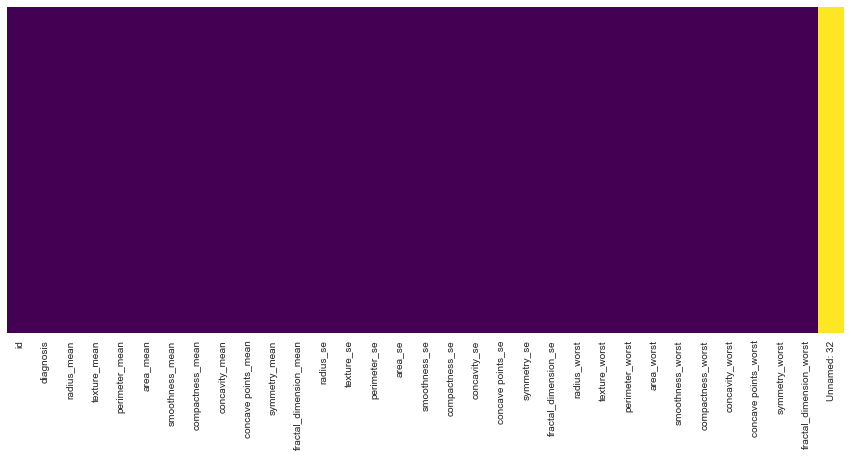

In [3]:
df= data[pd.notnull(data['diagnosis'])]
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
# Checking Missing Values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
X = df.iloc[:,2:32]  
y = df.iloc[:,1]
y.replace(['B', 'M'], [0, 1], inplace=True)

#### Creating K- Means object with n_clusters = 2

In [10]:
from sklearn.cluster import KMeans

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
kmeans = KMeans(n_clusters=2,random_state=0)
X = sc.fit_transform(X)

In [14]:
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X = X_sca.fit_transform(X)


In [15]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_

array([[-0.48299485, -0.23904142, -0.50041892, -0.47814154, -0.3110035 ,
        -0.52601873, -0.57903569, -0.58717117, -0.30908386, -0.1491409 ,
        -0.42798514, -0.02110994, -0.43097168, -0.40175149, -0.02383127,
        -0.37020054, -0.3345976 , -0.39771232, -0.07493017, -0.23682231,
        -0.51785387, -0.25147802, -0.53231144, -0.49935772, -0.31607814,
        -0.49224121, -0.53684332, -0.58010099, -0.30335497, -0.33672889],
       [ 0.93362406,  0.4620646 ,  0.96730462,  0.92424266,  0.60116657,
         1.01678879,  1.11927003,  1.13499581,  0.59745592,  0.28828783,
         0.82729086,  0.0408053 ,  0.83306382,  0.77658149,  0.0460656 ,
         0.71559384,  0.64677371,  0.76877382,  0.14483925,  0.45777508,
         1.00100618,  0.48610441,  1.02895252,  0.96525332,  0.61097579,
         0.95149718,  1.0377126 ,  1.12132923,  0.58638203,  0.65089347]])

In [17]:
predictions = kmeans.fit_predict(X)

In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y,predictions))

[[339  18]
 [ 36 176]]


#### Every time, if the accuracy is less than 50% , I will predict the opposite results, i.e. 1 to 0 and vice versa,
#### Because prediction can not go below 50% for a binary output

In [21]:
acc= round(100*accuracy_score(df['diagnosis'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(y,predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 90.51 %


### Expectation Maximization | Gaussian Mixture

In [22]:
from sklearn.mixture import GaussianMixture

#kmeans = KMeans(n_clusters=2,random_state=0)
Gaussian = GaussianMixture(n_components=2,random_state=0 )#covariance_type='tied')
Gaussian.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
probs = Gaussian.predict_proba(X)
Gaussian.score_samples(X)
predictions = Gaussian.predict(X)

In [24]:
print(confusion_matrix(y,predictions))

[[339  18]
 [ 16 196]]


In [27]:
acc= round(100*accuracy_score(y,predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(y,predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 94.02 %


### Dimentionality Reduction
#### 1.) Feature Selection
#### I am using Decision Tree to get the top 10 features

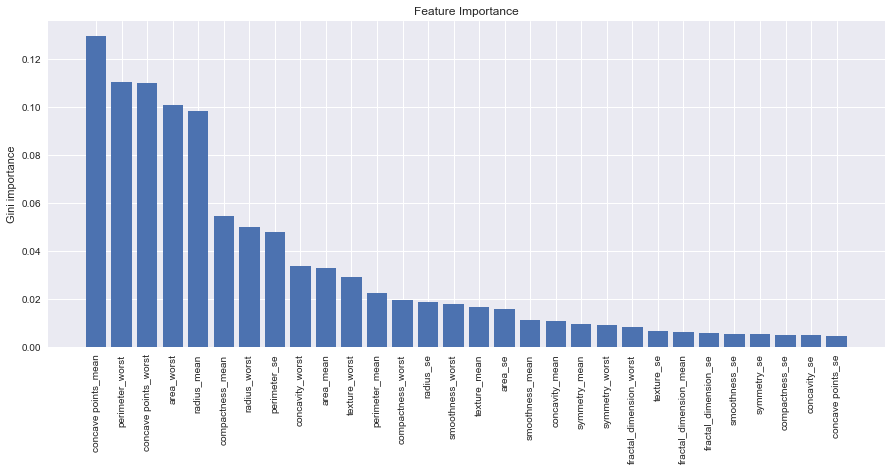

In [29]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())


dict_features = {}
for i in range(len(model.feature_importances_)):
    dict_features.update({df.iloc[:,2:32].columns[i]:100*model.feature_importances_[i]})
indices = np.argsort(model.feature_importances_)[::-1]


plt.bar(range(df.iloc[:,2:32].shape[1]),model.feature_importances_[indices], align='center')
plt.xticks(range(df.iloc[:,2:32].shape[1]), df.iloc[:,2:32].columns[indices], rotation='vertical')
plt.title("Feature Importance")
plt.ylabel("Gini importance")

#### Selecting top 10 attributes

In [30]:
top_10_attributes = []
count = 1
for i in indices:
    if count < 11:
        top_10_attributes.append(df.iloc[:,2:32].columns[i])
        count+=1
    else:
        break

In [31]:
top_10_attributes

['concave points_mean',
 'perimeter_worst',
 'concave points_worst',
 'area_worst',
 'radius_mean',
 'compactness_mean',
 'radius_worst',
 'perimeter_se',
 'concavity_worst',
 'area_mean']

### Running K-means after Feature Selection

In [32]:
kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(df[top_10_attributes])

predictions = kmeans.predict(df[top_10_attributes])

confusion_matrix(y,predictions)

acc= round(100*accuracy_score(y,predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(y,predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 85.24 %


### Feature Transformation¶
### --- PCA
#### For Visualizing Clusters, taking PCA = 2


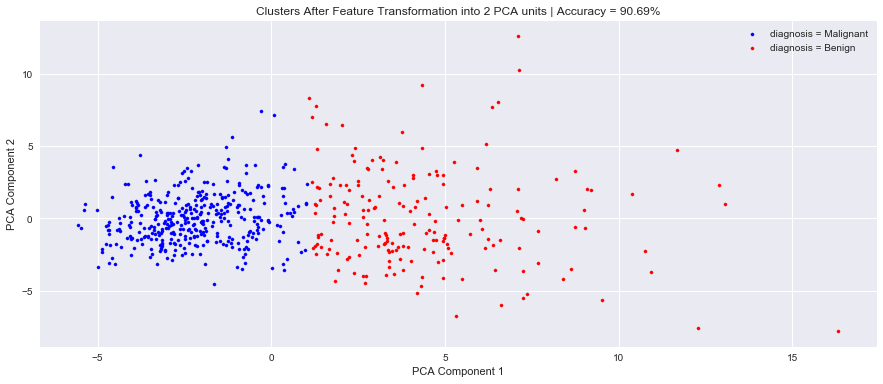

In [33]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=2,random_state=0)


pca = PCA(n_components=2)

X = pca.fit_transform(X)

kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

acc= round(100*accuracy_score(y,y_kmeans),2)

if acc < 50:
    y_kmeans = np.where(y_kmeans == 0, 1,0)
    
acc= round(100*accuracy_score(y,y_kmeans),2)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'blue', label = 'diagnosis = Malignant')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'red', label = 'diagnosis = Benign')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

### Principal Components Vs Explained Variance

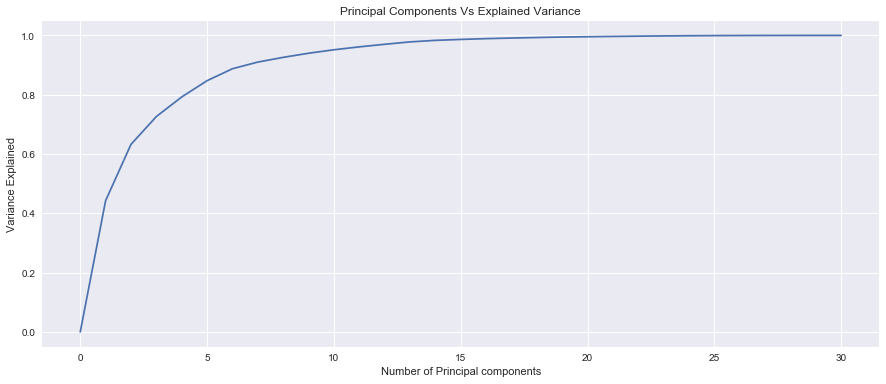

In [36]:
#PCA
var = []
for i in range(31):
    X = df.iloc[:,2:32]

    # Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X)

    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    ex_var  = pca.explained_variance_ratio_
    var.append(np.sum(ex_var))
plt.plot(var)
plt.xlabel("Number of Principal components")
plt.ylabel("Variance Explained")
plt.title("Principal Components Vs Explained Variance")

#### So we will choose 20 principal components, as percentage of variance explained ~ 0.99

(0, 25)

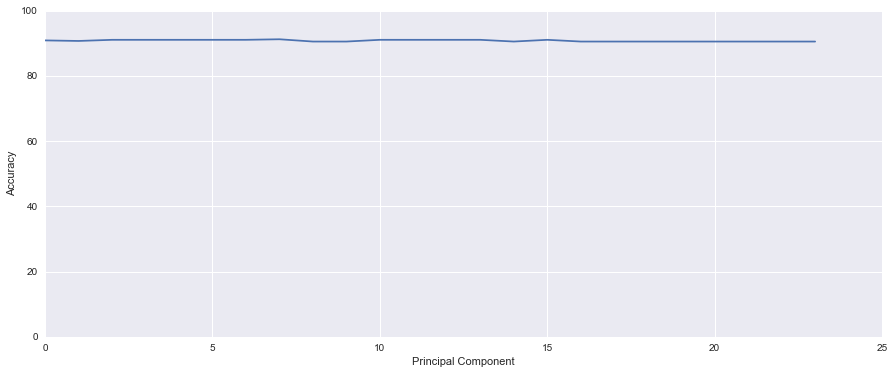

In [40]:
acc = []
for i in range(1,25):
    
    X = df.iloc[:,2:32]

    # Scaling

    X_train = sc.fit_transform(X)

    pca = PCA(n_components=i)
    
    X_train = pca.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    acc1= round(100*accuracy_score(y,predictions),2)

    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(y,predictions),2)

    acc.append(acc1)
plt.plot(acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0,100)
plt.xlabel("Principal Component")
plt.xlim(0,25)

In [41]:
acc

[90.86,
 90.69,
 91.04,
 91.04,
 91.04,
 91.04,
 91.04,
 91.21,
 90.51,
 90.51,
 91.04,
 91.04,
 91.04,
 91.04,
 90.51,
 91.04,
 90.51,
 90.51,
 90.51,
 90.51,
 90.51,
 90.51,
 90.51,
 90.51]

### Running K means 25 times, But Accuracy is almost similar , Max ~ 91.04 % on PCA = 2

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

kmeans = KMeans(n_clusters=2,random_state=0)
from sklearn.decomposition import FastICA



#### Hence, experimenting with Number of ICA components to find max accuracy at n_components = 16, Acc = 96.13%

In [44]:
acc = []
for i in range(1,31):
    
    X = df.iloc[:,2:32]


    # Scaling

    X_train = sc.fit_transform(X)


    ica = FastICA(n_components=i,max_iter=1000, tol=0.1)
    X_train = ica.fit_transform(X_train)
    #X_train = ica.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    
    acc1= round(100*accuracy_score(y,predictions),2)

    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(y,predictions),2)


    acc.append(acc1)


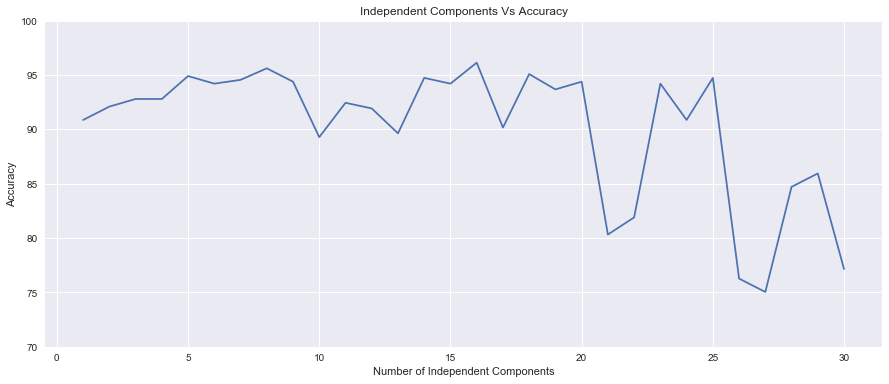

In [46]:
plt.plot(range(1,31),acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(70,100)
plt.xlabel("Number of Independent Components")
plt.title("Independent Components Vs Accuracy")

### -- Random Projection
### It is showing max Acc = 92.62% at 26 Random Projections

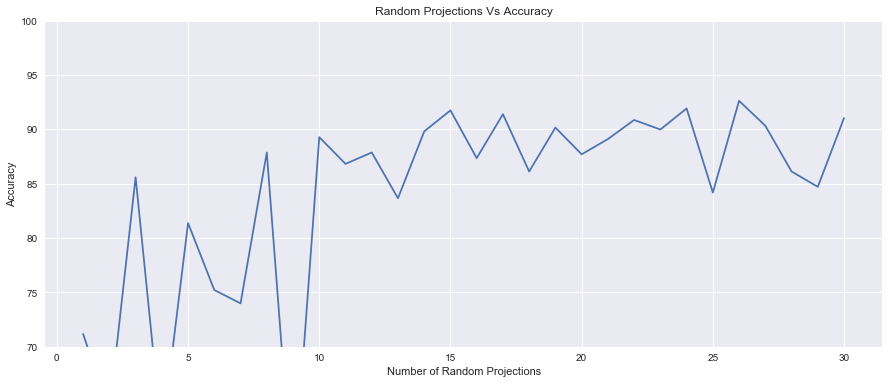

In [48]:
from sklearn import random_projection
acc = []
for i in range(1,31):

    X = df.iloc[:,2:32]
    # Scaling

    X_train = sc.fit_transform(X)


    transformer = random_projection.SparseRandomProjection(n_components=i)
    X_train = transformer.fit_transform(X_train)
    #X_train = ica.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    
    acc1= round(100*accuracy_score(y,predictions),2)
    
    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(y,predictions),2)


    acc.append(acc1)

plt.plot(range(1,31),acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(70,100)
plt.xlabel("Number of Random Projections")
plt.title("Random Projections Vs Accuracy")

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3,random_state=23)
X_train=train.iloc[:,2:32]
y_train=train['diagnosis']
X_test=test.iloc[:,2:32]
y_test=test['diagnosis']


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_val = pca.fit_transform(X_val)
X_test = pca.fit_transform(X_test)


In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=10, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from i

Epoch 1/20
278/278 [==============================] - 1s 2ms/step - loss: 0.6905 - acc: 0.6691
Epoch 2/20
278/278 [==============================] - 0s 112us/step - loss: 0.6752 - acc: 0.7194
Epoch 3/20
278/278 [==============================] - 0s 136us/step - loss: 0.6283 - acc: 0.8993
Epoch 4/20
278/278 [==============================] - 0s 112us/step - loss: 0.5266 - acc: 0.9640
Epoch 5/20
278/278 [==============================] - 0s 112us/step - loss: 0.3847 - acc: 0.9712
Epoch 6/20
278/278 [==============================] - 0s 80us/step - loss: 0.2563 - acc: 0.9784
Epoch 7/20
278/278 [==============================] - 0s 112us/step - loss: 0.1731 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 112us/step - loss: 0.1256 - acc: 0.9892
Epoch 9/20
278/278 [==============================] - 0s 80us/step - loss: 0.0982 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 113us/step - loss: 0.0816 - acc: 0.9892
Epoch 11/20
278/278 [============

In [52]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [53]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 99.28%
Test accuracy = 92.98%


In [60]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 11))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=20, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 1s 3ms/step - loss: 0.6798 - acc: 0.7014
Epoch 2/20
278/278 [==============================] - 0s 317us/step - loss: 0.6403 - acc: 0.8489
Epoch 3/20
278/278 [==============================] - 0s 210us/step - loss: 0.5688 - acc: 0.9281
Epoch 4/20
278/278 [==============================] - 0s 311us/step - loss: 0.4715 - acc: 0.9460
Epoch 5/20
278/278 [==============================] - 0s 367us/step - loss: 0.3693 - acc: 0.9604
Epoch 6/20
278/278 [==============================] - 0s 374us/step - loss: 0.2855 - acc: 0.9604
Epoch 7/20
278/278 [==============================] - 0s 486us/step - loss: 0.2241 - acc: 0.9748
Epoch 8/20
278/278 [==============================] - 0s 346us/step - loss: 0.1813 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 440us/step - loss: 0.1513 - acc: 0.9856
Epoch 10/20
278/278 [==============================] - 0s 435us/step - loss: 0.1295 - acc: 0.9892
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6888 - acc: 0.6583
Epoch 2/20
278/278 [==============================] - 0s 478us/step - loss: 0.6571 - acc: 0.9029
Epoch 3/20
278/278 [==============================] - 0s 485us/step - loss: 0.5493 - acc: 0.9532
Epoch 4/20
278/278 [==============================] - 0s 503us/step - loss: 0.3579 - acc: 0.9676
Epoch 5/20
278/278 [==============================] - 0s 518us/step - loss: 0.1961 - acc: 0.9820
Epoch 6/20
278/278 [==============================] - 0s 397us/step - loss: 0.1193 - acc: 0.9892
Epoch 7/20
278/278 [==============================] - 0s 350us/step - loss: 0.0872 - acc: 0.9928
Epoch 8/20
278/278 [==============================] - 0s 392us/step - loss: 0.0705 - acc: 0.9928
Epoch 9/20
278/278 [==============================] - 0s 371us/step - loss: 0.0608 - acc: 0.9928
Epoch 10/20
278/278 [==============================] - 0s 504us/step - loss: 0.0549 - acc: 0.9928
Epoch 11/20
278/278 [==========

278/278 [==============================] - 0s 339us/step - loss: 0.2969 - acc: 0.6439
Epoch 6/20
278/278 [==============================] - 0s 270us/step - loss: 0.2791 - acc: 0.6439
Epoch 7/20
278/278 [==============================] - 0s 338us/step - loss: 0.2664 - acc: 0.7626
Epoch 8/20
278/278 [==============================] - 0s 362us/step - loss: 0.2593 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 239us/step - loss: 0.2538 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 163us/step - loss: 0.2434 - acc: 0.9892
Epoch 11/20
278/278 [==============================] - 0s 294us/step - loss: 0.2387 - acc: 0.9928
Epoch 12/20
278/278 [==============================] - 0s 243us/step - loss: 0.2307 - acc: 0.9964
Epoch 13/20
278/278 [==============================] - 0s 253us/step - loss: 0.2290 - acc: 0.9892
Epoch 14/20
278/278 [==============================] - 0s 256us/step - loss: 0.2312 - acc: 0.9856
Epoch 15/20
278/278 [===============

278/278 [==============================] - 0s 396us/step - loss: 0.2906 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 319us/step - loss: 0.2737 - acc: 0.9388
Epoch 10/20
278/278 [==============================] - 0s 295us/step - loss: 0.2615 - acc: 0.9820
Epoch 11/20
278/278 [==============================] - 0s 340us/step - loss: 0.2336 - acc: 0.9892
Epoch 12/20
278/278 [==============================] - 0s 304us/step - loss: 0.1992 - acc: 0.9892
Epoch 13/20
278/278 [==============================] - 0s 360us/step - loss: 0.1446 - acc: 0.9928
Epoch 14/20
278/278 [==============================] - 0s 375us/step - loss: 0.0680 - acc: 0.9892
Epoch 15/20
278/278 [==============================] - 0s 351us/step - loss: 0.0247 - acc: 0.9928
Epoch 16/20
278/278 [==============================] - 0s 361us/step - loss: 0.0630 - acc: 0.9856
Epoch 17/20
278/278 [==============================] - 0s 310us/step - loss: 0.0225 - acc: 0.9928
Epoch 18/20
278/278 [============

In [63]:
accuracy_validation

[89.17, 86.67, 87.5, 88.33, 87.5, 85.83, 87.5, 87.5, 87.5, 85.0]

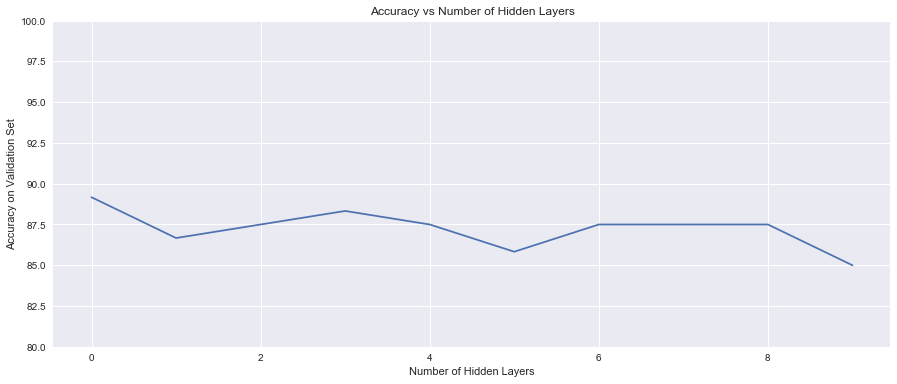

In [64]:
plt.ylim([80,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

**As we see, Number of Hidden layers decrease accuracy on adding 1st layer we will keep 0 hidden layer in the NN**
### Experiment 2
#### No of Nodes in Hidden Layer

In [65]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(5,15):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes , init = 'uniform', activation = 'relu', input_dim = 11))
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=5, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6899 - acc: 0.7338
Epoch 2/20
278/278 [==============================] - 0s 276us/step - loss: 0.6780 - acc: 0.8705
Epoch 3/20
278/278 [==============================] - 0s 282us/step - loss: 0.6569 - acc: 0.9353
Epoch 4/20
278/278 [==============================] - 0s 251us/step - loss: 0.6240 - acc: 0.9712
Epoch 5/20
278/278 [==============================] - 0s 244us/step - loss: 0.5818 - acc: 0.9784
Epoch 6/20
278/278 [==============================] - 0s 253us/step - loss: 0.5357 - acc: 0.9820
Epoch 7/20
278/278 [==============================] - 0s 305us/step - loss: 0.4892 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 336us/step - loss: 0.4444 - acc: 0.9856
Epoch 9/20
278/278 [==============================] - 0s 259us/step - loss: 0.4039 - acc: 0.9856
Epoch 10/20
278/278 [==============================] - 0s 269us/step - loss: 0.3675 - acc: 0.9820
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6916 - acc: 0.6079
Epoch 2/20
278/278 [==============================] - 0s 379us/step - loss: 0.6806 - acc: 0.7986
Epoch 3/20
278/278 [==============================] - 0s 301us/step - loss: 0.6596 - acc: 0.8885
Epoch 4/20
278/278 [==============================] - 0s 228us/step - loss: 0.6225 - acc: 0.9424
Epoch 5/20
278/278 [==============================] - 0s 278us/step - loss: 0.5693 - acc: 0.9568
Epoch 6/20
278/278 [==============================] - 0s 284us/step - loss: 0.5052 - acc: 0.9712
Epoch 7/20
278/278 [==============================] - 0s 317us/step - loss: 0.4380 - acc: 0.9712
Epoch 8/20
278/278 [==============================] - 0s 266us/step - loss: 0.3751 - acc: 0.9748
Epoch 9/20
278/278 [==============================] - 0s 174us/step - loss: 0.3198 - acc: 0.9748
Epoch 10/20
278/278 [==============================] - 0s 288us/step - loss: 0.2745 - acc: 0.9820
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=7, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6843 - acc: 0.8273
Epoch 2/20
278/278 [==============================] - 0s 394us/step - loss: 0.6651 - acc: 0.8705
Epoch 3/20
278/278 [==============================] - 0s 426us/step - loss: 0.6307 - acc: 0.9353
Epoch 4/20
278/278 [==============================] - 0s 253us/step - loss: 0.5801 - acc: 0.9568
Epoch 5/20
278/278 [==============================] - 0s 484us/step - loss: 0.5163 - acc: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 377us/step - loss: 0.4478 - acc: 0.9676
Epoch 7/20
278/278 [==============================] - 0s 354us/step - loss: 0.3824 - acc: 0.9748
Epoch 8/20
278/278 [==============================] - 0s 276us/step - loss: 0.3244 - acc: 0.9856
Epoch 9/20
278/278 [==============================] - 0s 193us/step - loss: 0.2765 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 172us/step - loss: 0.2375 - acc: 0.9892
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=8, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6889 - acc: 0.7446
Epoch 2/20
278/278 [==============================] - 0s 295us/step - loss: 0.6739 - acc: 0.9065
Epoch 3/20
278/278 [==============================] - 0s 298us/step - loss: 0.6470 - acc: 0.9532
Epoch 4/20
278/278 [==============================] - 0s 315us/step - loss: 0.6032 - acc: 0.9676
Epoch 5/20
278/278 [==============================] - 0s 280us/step - loss: 0.5455 - acc: 0.9712
Epoch 6/20
278/278 [==============================] - 0s 294us/step - loss: 0.4823 - acc: 0.9784
Epoch 7/20
278/278 [==============================] - 0s 441us/step - loss: 0.4217 - acc: 0.9748
Epoch 8/20
278/278 [==============================] - 0s 320us/step - loss: 0.3673 - acc: 0.9784
Epoch 9/20
278/278 [==============================] - 0s 306us/step - loss: 0.3199 - acc: 0.9784
Epoch 10/20
278/278 [==============================] - 0s 323us/step - loss: 0.2795 - acc: 0.9784
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=9, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6826 - acc: 0.8633
Epoch 2/20
278/278 [==============================] - 0s 169us/step - loss: 0.6597 - acc: 0.8705
Epoch 3/20
278/278 [==============================] - 0s 192us/step - loss: 0.6190 - acc: 0.9353
Epoch 4/20
278/278 [==============================] - 0s 169us/step - loss: 0.5588 - acc: 0.9460
Epoch 5/20
278/278 [==============================] - 0s 192us/step - loss: 0.4854 - acc: 0.9604
Epoch 6/20
278/278 [==============================] - 0s 169us/step - loss: 0.4098 - acc: 0.9748
Epoch 7/20
278/278 [==============================] - 0s 192us/step - loss: 0.3409 - acc: 0.9748
Epoch 8/20
278/278 [==============================] - 0s 169us/step - loss: 0.2840 - acc: 0.9856
Epoch 9/20
278/278 [==============================] - 0s 136us/step - loss: 0.2388 - acc: 0.9856
Epoch 10/20
278/278 [==============================] - 0s 169us/step - loss: 0.2036 - acc: 0.9856
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=10, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6869 - acc: 0.7266
Epoch 2/20
278/278 [==============================] - 0s 275us/step - loss: 0.6676 - acc: 0.8669
Epoch 3/20
278/278 [==============================] - 0s 276us/step - loss: 0.6264 - acc: 0.9496
Epoch 4/20
278/278 [==============================] - 0s 297us/step - loss: 0.5620 - acc: 0.9676
Epoch 5/20
278/278 [==============================] - 0s 347us/step - loss: 0.4830 - acc: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 285us/step - loss: 0.4019 - acc: 0.9820
Epoch 7/20
278/278 [==============================] - 0s 265us/step - loss: 0.3303 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 234us/step - loss: 0.2724 - acc: 0.9856
Epoch 9/20
278/278 [==============================] - 0s 183us/step - loss: 0.2270 - acc: 0.9856
Epoch 10/20
278/278 [==============================] - 0s 211us/step - loss: 0.1926 - acc: 0.9892
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=11, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6875 - acc: 0.6331
Epoch 2/20
278/278 [==============================] - 0s 177us/step - loss: 0.6675 - acc: 0.7410
Epoch 3/20
278/278 [==============================] - 0s 159us/step - loss: 0.6329 - acc: 0.8633
Epoch 4/20
278/278 [==============================] - 0s 145us/step - loss: 0.5767 - acc: 0.9317
Epoch 5/20
278/278 [==============================] - 0s 228us/step - loss: 0.5027 - acc: 0.9532
Epoch 6/20
278/278 [==============================] - 0s 174us/step - loss: 0.4194 - acc: 0.9640
Epoch 7/20
278/278 [==============================] - 0s 183us/step - loss: 0.3405 - acc: 0.9640
Epoch 8/20
278/278 [==============================] - 0s 199us/step - loss: 0.2757 - acc: 0.9676
Epoch 9/20
278/278 [==============================] - 0s 146us/step - loss: 0.2264 - acc: 0.9748
Epoch 10/20
278/278 [==============================] - 0s 196us/step - loss: 0.1895 - acc: 0.9784
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=12, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6876 - acc: 0.6115
Epoch 2/20
278/278 [==============================] - 0s 307us/step - loss: 0.6662 - acc: 0.6906
Epoch 3/20
278/278 [==============================] - 0s 295us/step - loss: 0.6271 - acc: 0.7662
Epoch 4/20
278/278 [==============================] - 0s 304us/step - loss: 0.5680 - acc: 0.9029
Epoch 5/20
278/278 [==============================] - 0s 234us/step - loss: 0.4928 - acc: 0.9496
Epoch 6/20
278/278 [==============================] - 0s 182us/step - loss: 0.4132 - acc: 0.9568
Epoch 7/20
278/278 [==============================] - 0s 180us/step - loss: 0.3400 - acc: 0.9604
Epoch 8/20
278/278 [==============================] - 0s 180us/step - loss: 0.2791 - acc: 0.9676
Epoch 9/20
278/278 [==============================] - 0s 181us/step - loss: 0.2311 - acc: 0.9712
Epoch 10/20
278/278 [==============================] - 0s 179us/step - loss: 0.1945 - acc: 0.9820
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=13, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6849 - acc: 0.7914
Epoch 2/20
278/278 [==============================] - 0s 168us/step - loss: 0.6649 - acc: 0.9137
Epoch 3/20
278/278 [==============================] - 0s 260us/step - loss: 0.6294 - acc: 0.9496
Epoch 4/20
278/278 [==============================] - 0s 176us/step - loss: 0.5668 - acc: 0.9604
Epoch 5/20
278/278 [==============================] - 0s 179us/step - loss: 0.4779 - acc: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 220us/step - loss: 0.3829 - acc: 0.9820
Epoch 7/20
278/278 [==============================] - 0s 214us/step - loss: 0.3010 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 139us/step - loss: 0.2391 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 240us/step - loss: 0.1948 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 178us/step - loss: 0.1635 - acc: 0.9892
Epoch 11/20
278/278 [==========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=14, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6852 - acc: 0.8094
Epoch 2/20
278/278 [==============================] - 0s 193us/step - loss: 0.6612 - acc: 0.9353
Epoch 3/20
278/278 [==============================] - 0s 231us/step - loss: 0.6140 - acc: 0.9532
Epoch 4/20
278/278 [==============================] - 0s 182us/step - loss: 0.5403 - acc: 0.9640
Epoch 5/20
278/278 [==============================] - 0s 232us/step - loss: 0.4514 - acc: 0.9712
Epoch 6/20
278/278 [==============================] - 0s 184us/step - loss: 0.3639 - acc: 0.9784
Epoch 7/20
278/278 [==============================] - 0s 183us/step - loss: 0.2898 - acc: 0.9784
Epoch 8/20
278/278 [==============================] - 0s 176us/step - loss: 0.2337 - acc: 0.9856
Epoch 9/20
278/278 [==============================] - 0s 151us/step - loss: 0.1924 - acc: 0.9856
Epoch 10/20
278/278 [==============================] - 0s 159us/step - loss: 0.1622 - acc: 0.9856
Epoch 11/20
278/278 [==========

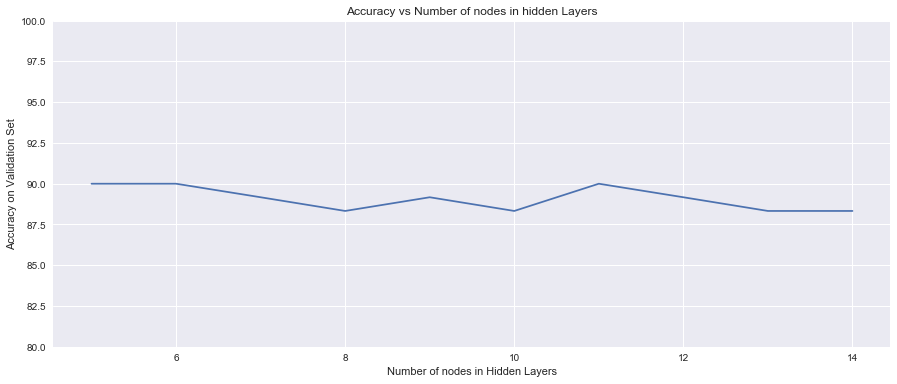

In [66]:
plt.ylim([80,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [67]:
accuracy_validation = [None]*20
count = 0
for batchSize in range(5,25):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 11))
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=5, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 1s 5ms/step - loss: 0.6849 - acc: 0.7302
Epoch 2/20
278/278 [==============================] - 0s 458us/step - loss: 0.6533 - acc: 0.8489
Epoch 3/20
278/278 [==============================] - 0s 533us/step - loss: 0.5856 - acc: 0.9353
Epoch 4/20
278/278 [==============================] - 0s 487us/step - loss: 0.4837 - acc: 0.9604
Epoch 5/20
278/278 [==============================] - 0s 509us/step - loss: 0.3758 - acc: 0.9712
Epoch 6/20
278/278 [==============================] - 0s 429us/step - loss: 0.2906 - acc: 0.9784
Epoch 7/20
278/278 [==============================] - 0s 778us/step - loss: 0.2301 - acc: 0.9820
Epoch 8/20
278/278 [==============================] - 0s 720us/step - loss: 0.1876 - acc: 0.9820
Epoch 9/20
278/278 [==============================] - 0s 621us/step - loss: 0.1576 - acc: 0.9892
Epoch 10/20
278/278 [==============================] - 0s 647us/step - loss: 0.1367 - acc: 0.9892
Epoch 11/20
278/278 [==========

278/278 [==============================] - 0s 302us/step - loss: 0.5534 - acc: 0.9676
Epoch 6/20
278/278 [==============================] - 0s 291us/step - loss: 0.4912 - acc: 0.9748
Epoch 7/20
278/278 [==============================] - 0s 313us/step - loss: 0.4289 - acc: 0.9784
Epoch 8/20
278/278 [==============================] - 0s 238us/step - loss: 0.3724 - acc: 0.9784
Epoch 9/20
278/278 [==============================] - 0s 227us/step - loss: 0.3231 - acc: 0.9784
Epoch 10/20
278/278 [==============================] - 0s 224us/step - loss: 0.2811 - acc: 0.9784
Epoch 11/20
278/278 [==============================] - 0s 191us/step - loss: 0.2463 - acc: 0.9784
Epoch 12/20
278/278 [==============================] - 0s 244us/step - loss: 0.2177 - acc: 0.9784
Epoch 13/20
278/278 [==============================] - 0s 179us/step - loss: 0.1939 - acc: 0.9820
Epoch 14/20
278/278 [==============================] - 0s 260us/step - loss: 0.1745 - acc: 0.9892
Epoch 15/20
278/278 [===============

278/278 [==============================] - 0s 304us/step - loss: 0.4237 - acc: 0.9748
Epoch 10/20
278/278 [==============================] - 0s 208us/step - loss: 0.3802 - acc: 0.9748
Epoch 11/20
278/278 [==============================] - 0s 174us/step - loss: 0.3400 - acc: 0.9784
Epoch 12/20
278/278 [==============================] - 0s 155us/step - loss: 0.3045 - acc: 0.9784
Epoch 13/20
278/278 [==============================] - 0s 204us/step - loss: 0.2735 - acc: 0.9784
Epoch 14/20
278/278 [==============================] - 0s 227us/step - loss: 0.2464 - acc: 0.9856
Epoch 15/20
278/278 [==============================] - 0s 189us/step - loss: 0.2233 - acc: 0.9856
Epoch 16/20
278/278 [==============================] - 0s 273us/step - loss: 0.2038 - acc: 0.9892
Epoch 17/20
278/278 [==============================] - 0s 216us/step - loss: 0.1866 - acc: 0.9892
Epoch 18/20
278/278 [==============================] - 0s 257us/step - loss: 0.1718 - acc: 0.9892
Epoch 19/20
278/278 [===========

278/278 [==============================] - 0s 158us/step - loss: 0.3695 - acc: 0.9712
Epoch 14/20
278/278 [==============================] - 0s 148us/step - loss: 0.3377 - acc: 0.9784
Epoch 15/20
278/278 [==============================] - 0s 156us/step - loss: 0.3092 - acc: 0.9820
Epoch 16/20
278/278 [==============================] - 0s 159us/step - loss: 0.2832 - acc: 0.9820
Epoch 17/20
278/278 [==============================] - 0s 145us/step - loss: 0.2600 - acc: 0.9820
Epoch 18/20
278/278 [==============================] - 0s 125us/step - loss: 0.2394 - acc: 0.9856
Epoch 19/20
278/278 [==============================] - 0s 169us/step - loss: 0.2210 - acc: 0.9856
Epoch 20/20
278/278 [==============================] - 0s 120us/step - loss: 0.2048 - acc: 0.9892
Epoch 1/20
278/278 [==============================] - 2s 5ms/step - loss: 0.6907 - acc: 0.7194
Epoch 2/20
278/278 [==============================] - 0s 108us/step - loss: 0.6856 - acc: 0.7122
Epoch 3/20
278/278 [================

278/278 [==============================] - 0s 135us/step - loss: 0.3586 - acc: 0.9748
Epoch 17/20
278/278 [==============================] - 0s 126us/step - loss: 0.3331 - acc: 0.9784
Epoch 18/20
278/278 [==============================] - 0s 57us/step - loss: 0.3094 - acc: 0.9820
Epoch 19/20
278/278 [==============================] - 0s 110us/step - loss: 0.2878 - acc: 0.9820
Epoch 20/20
278/278 [==============================] - 0s 136us/step - loss: 0.2678 - acc: 0.9820
Epoch 1/20
278/278 [==============================] - 2s 6ms/step - loss: 0.6887 - acc: 0.7950
Epoch 2/20
278/278 [==============================] - 0s 169us/step - loss: 0.6831 - acc: 0.7806
Epoch 3/20
278/278 [==============================] - 0s 83us/step - loss: 0.6765 - acc: 0.7734
Epoch 4/20
278/278 [==============================] - 0s 90us/step - loss: 0.6683 - acc: 0.7878
Epoch 5/20
278/278 [==============================] - 0s 181us/step - loss: 0.6576 - acc: 0.8094
Epoch 6/20
278/278 [======================

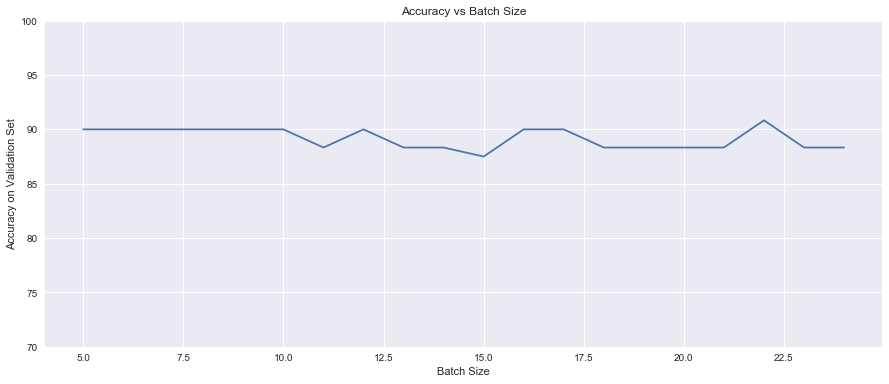

In [70]:
plt.ylim([70,100])
plt.plot(range(5,25),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

In [72]:
accuracy_test = [None]*20
count = 0
for nb_epoch in range(20,40):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 11))
   
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 22, nb_epoch = nb_epoch)
    accuracy_test[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1# Adding the input layer and the first hidden layer


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=5, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 2s 7ms/step - loss: 0.6908 - acc: 0.8201
Epoch 2/20
278/278 [==============================] - 0s 288us/step - loss: 0.6866 - acc: 0.8453
Epoch 3/20
278/278 [==============================] - 0s 216us/step - loss: 0.6813 - acc: 0.8525
Epoch 4/20
278/278 [==============================] - 0s 267us/step - loss: 0.6740 - acc: 0.8741
Epoch 5/20
278/278 [==============================] - ETA: 0s - loss: 0.6652 - acc: 0.904 - 0s 245us/step - loss: 0.6637 - acc: 0.8993
Epoch 6/20
278/278 [==============================] - 0s 239us/step - loss: 0.6503 - acc: 0.9245
Epoch 7/20
278/278 [==============================] - 0s 295us/step - loss: 0.6325 - acc: 0.9460
Epoch 8/20
278/278 [==============================] - 0s 158us/step - loss: 0.6117 - acc: 0.9532
Epoch 9/20
278/278 [==============================] - 0s 201us/step - loss: 0.5877 - acc: 0.9640
Epoch 10/20
278/278 [==============================] - 0s 244us/step - loss: 0.5619 - acc: 

278/278 [==============================] - 0s 173us/step - loss: 0.2827 - acc: 0.9892
Epoch 22/23
278/278 [==============================] - 0s 199us/step - loss: 0.2663 - acc: 0.9892
Epoch 23/23
278/278 [==============================] - 0s 164us/step - loss: 0.2512 - acc: 0.9892
Epoch 1/24
278/278 [==============================] - 2s 7ms/step - loss: 0.6908 - acc: 0.6367
Epoch 2/24
278/278 [==============================] - 0s 153us/step - loss: 0.6864 - acc: 0.6439
Epoch 3/24
278/278 [==============================] - 0s 143us/step - loss: 0.6803 - acc: 0.6439
Epoch 4/24
278/278 [==============================] - 0s 129us/step - loss: 0.6722 - acc: 0.6439
Epoch 5/24
278/278 [==============================] - 0s 148us/step - loss: 0.6606 - acc: 0.6439
Epoch 6/24
278/278 [==============================] - 0s 81us/step - loss: 0.6455 - acc: 0.6439
Epoch 7/24
278/278 [==============================] - 0s 100us/step - loss: 0.6276 - acc: 0.6439
Epoch 8/24
278/278 [======================

278/278 [==============================] - 0s 110us/step - loss: 0.6455 - acc: 0.9568
Epoch 8/27
278/278 [==============================] - 0s 154us/step - loss: 0.6284 - acc: 0.9640
Epoch 9/27
278/278 [==============================] - 0s 96us/step - loss: 0.6075 - acc: 0.9676
Epoch 10/27
278/278 [==============================] - 0s 158us/step - loss: 0.5838 - acc: 0.9748
Epoch 11/27
278/278 [==============================] - 0s 144us/step - loss: 0.5573 - acc: 0.9820
Epoch 12/27
278/278 [==============================] - 0s 128us/step - loss: 0.5290 - acc: 0.9820
Epoch 13/27
278/278 [==============================] - 0s 56us/step - loss: 0.5001 - acc: 0.9892
Epoch 14/27
278/278 [==============================] - 0s 133us/step - loss: 0.4710 - acc: 0.9892
Epoch 15/27
278/278 [==============================] - 0s 121us/step - loss: 0.4420 - acc: 0.9892
Epoch 16/27
278/278 [==============================] - 0s 118us/step - loss: 0.4139 - acc: 0.9892
Epoch 17/27
278/278 [===============

278/278 [==============================] - 0s 143us/step - loss: 0.6374 - acc: 0.9388
Epoch 8/30
278/278 [==============================] - 0s 139us/step - loss: 0.6196 - acc: 0.9568
Epoch 9/30
278/278 [==============================] - 0s 109us/step - loss: 0.5984 - acc: 0.9640
Epoch 10/30
278/278 [==============================] - 0s 145us/step - loss: 0.5761 - acc: 0.9748
Epoch 11/30
278/278 [==============================] - 0s 125us/step - loss: 0.5528 - acc: 0.9784
Epoch 12/30
278/278 [==============================] - 0s 85us/step - loss: 0.5280 - acc: 0.9856
Epoch 13/30
278/278 [==============================] - 0s 209us/step - loss: 0.5034 - acc: 0.9856
Epoch 14/30
278/278 [==============================] - 0s 186us/step - loss: 0.4792 - acc: 0.9856
Epoch 15/30
278/278 [==============================] - 0s 175us/step - loss: 0.4562 - acc: 0.9856
Epoch 16/30
278/278 [==============================] - 0s 197us/step - loss: 0.4336 - acc: 0.9856
Epoch 17/30
278/278 [==============

278/278 [==============================] - 0s 210us/step - loss: 0.1608 - acc: 0.9892
Epoch 31/32
278/278 [==============================] - 0s 160us/step - loss: 0.1533 - acc: 0.9892
Epoch 32/32
278/278 [==============================] - 0s 153us/step - loss: 0.1465 - acc: 0.9892
Epoch 1/33
278/278 [==============================] - 2s 8ms/step - loss: 0.6906 - acc: 0.8129
Epoch 2/33
278/278 [==============================] - 0s 128us/step - loss: 0.6856 - acc: 0.8489
Epoch 3/33
278/278 [==============================] - 0s 122us/step - loss: 0.6792 - acc: 0.8705
Epoch 4/33
278/278 [==============================] - 0s 125us/step - loss: 0.6706 - acc: 0.9173
Epoch 5/33
278/278 [==============================] - 0s 184us/step - loss: 0.6598 - acc: 0.9353
Epoch 6/33
278/278 [==============================] - 0s 119us/step - loss: 0.6461 - acc: 0.9460
Epoch 7/33
278/278 [==============================] - 0s 117us/step - loss: 0.6296 - acc: 0.9640
Epoch 8/33
278/278 [=====================

278/278 [==============================] - 0s 112us/step - loss: 0.4239 - acc: 0.9856
Epoch 16/35
278/278 [==============================] - 0s 112us/step - loss: 0.3976 - acc: 0.9892
Epoch 17/35
278/278 [==============================] - 0s 136us/step - loss: 0.3728 - acc: 0.9892
Epoch 18/35
278/278 [==============================] - 0s 112us/step - loss: 0.3493 - acc: 0.9892
Epoch 19/35
278/278 [==============================] - 0s 192us/step - loss: 0.3277 - acc: 0.9892
Epoch 20/35
278/278 [==============================] - 0s 169us/step - loss: 0.3076 - acc: 0.9892
Epoch 21/35
278/278 [==============================] - 0s 169us/step - loss: 0.2887 - acc: 0.9892
Epoch 22/35
278/278 [==============================] - 0s 169us/step - loss: 0.2714 - acc: 0.9892
Epoch 23/35
278/278 [==============================] - 0s 279us/step - loss: 0.2554 - acc: 0.9892
Epoch 24/35
278/278 [==============================] - 0s 275us/step - loss: 0.2408 - acc: 0.9892
Epoch 25/35
278/278 [===========

278/278 [==============================] - 0s 56us/step - loss: 0.1924 - acc: 0.9892
Epoch 28/37
278/278 [==============================] - 0s 112us/step - loss: 0.1814 - acc: 0.9892
Epoch 29/37
278/278 [==============================] - 0s 80us/step - loss: 0.1716 - acc: 0.9892
Epoch 30/37
278/278 [==============================] - 0s 112us/step - loss: 0.1626 - acc: 0.9892
Epoch 31/37
278/278 [==============================] - 0s 112us/step - loss: 0.1545 - acc: 0.9892
Epoch 32/37
278/278 [==============================] - 0s 136us/step - loss: 0.1472 - acc: 0.9892
Epoch 33/37
278/278 [==============================] - 0s 112us/step - loss: 0.1405 - acc: 0.9892
Epoch 34/37
278/278 [==============================] - 0s 112us/step - loss: 0.1346 - acc: 0.9892
Epoch 35/37
278/278 [==============================] - 0s 136us/step - loss: 0.1289 - acc: 0.9892
Epoch 36/37
278/278 [==============================] - 0s 112us/step - loss: 0.1237 - acc: 0.9892
Epoch 37/37
278/278 [=============

Epoch 36/39
278/278 [==============================] - 0s 169us/step - loss: 0.1239 - acc: 0.9856
Epoch 37/39
278/278 [==============================] - 0s 56us/step - loss: 0.1193 - acc: 0.9856
Epoch 38/39
278/278 [==============================] - 0s 80us/step - loss: 0.1151 - acc: 0.9892
Epoch 39/39
278/278 [==============================] - 0s 112us/step - loss: 0.1113 - acc: 0.9892


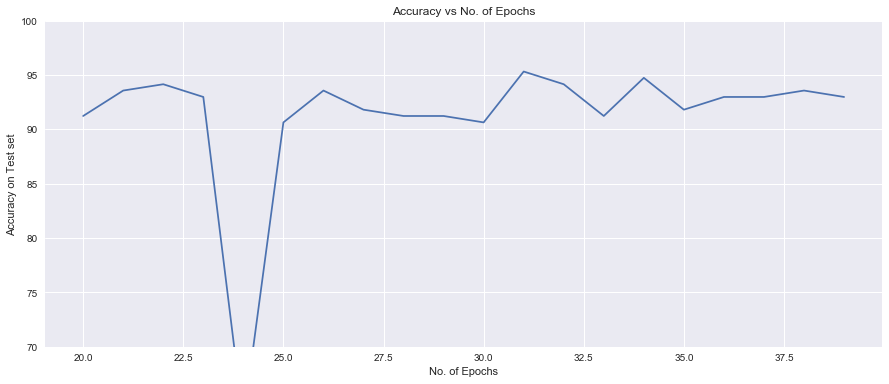

In [74]:
plt.ylim([70,100])
plt.plot(range(20,40),accuracy_test)
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy on Test set")

In [75]:
print('Test accuracy after pca dimensionality reduction',max(accuracy_test),'%')   

Test accuracy after pca dimensionality reduction 95.32 %


In [77]:
kmeans = KMeans(n_clusters=2,random_state=0)
X = sc.fit_transform(df.iloc[:,2:32])

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [78]:
predictions_KMeans = kmeans.predict(X)

In [79]:
Gaussian.fit(X)

predictions = Gaussian.predict(X)
probs_EM = Gaussian.predict_proba(X)

In [84]:
new_Df = pd.DataFrame()
data = pd.DataFrame({"KM_Pred": predictions_KMeans,"EM_Prob": probs_EM[:,1],"diagnosis": df['diagnosis']})
new_Df=new_Df.append(data)

In [85]:
new_Df

,KM_Pred,EM_Prob,diagnosis
0,1,1.000000e+00,1
1,1,1.000000e+00,1
2,1,1.000000e+00,1
3,1,1.000000e+00,1
4,1,1.000000e+00,1
5,1,1.000000e+00,1
6,1,1.000000e+00,1
7,1,1.000000e+00,1
8,1,1.000000e+00,1
9,1,1.000000e+00,1


In [86]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_Df, test_size=0.3,random_state=23)


X_train=train.iloc[:,:2]
y_train=train.iloc[:,2]
X_test=test.iloc[:,:2]
y_test=test.iloc[:,2]


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)




In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 3s 9ms/step - loss: 0.6919 - acc: 0.6187 
Epoch 2/20
278/278 [==============================] - 0s 403us/step - loss: 0.6891 - acc: 0.6439
Epoch 3/20
278/278 [==============================] - 0s 267us/step - loss: 0.6865 - acc: 0.6439
Epoch 4/20
278/278 [==============================] - 0s 367us/step - loss: 0.6841 - acc: 0.6439
Epoch 5/20
278/278 [==============================] - 0s 334us/step - loss: 0.6817 - acc: 0.6439
Epoch 6/20
278/278 [==============================] - 0s 285us/step - loss: 0.6797 - acc: 0.6439
Epoch 7/20
278/278 [==============================] - 0s 559us/step - loss: 0.6776 - acc: 0.6439
Epoch 8/20
278/278 [==============================] - 0s 512us/step - loss: 0.6756 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 415us/step - loss: 0.6739 - acc: 0.6439
Epoch 10/20
278/278 [==============================] - 0s 360us/step - loss: 0.6721 - acc: 0.6439
Epoch 11/20
278/278 [=========

In [88]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [89]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 64.39%
Test accuracy = 63.16%


In [90]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 2))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=20, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 2s 8ms/step - loss: 0.6878 - acc: 0.8957
Epoch 2/20
278/278 [==============================] - 0s 322us/step - loss: 0.6697 - acc: 0.9173
Epoch 3/20
278/278 [==============================] - 0s 493us/step - loss: 0.6359 - acc: 0.9209
Epoch 4/20
278/278 [==============================] - 0s 489us/step - loss: 0.5846 - acc: 0.9209
Epoch 5/20
278/278 [==============================] - 0s 800us/step - loss: 0.5223 - acc: 0.9209 0s - loss: 0.5234 - acc: 0.930
Epoch 6/20
278/278 [==============================] - 0s 560us/step - loss: 0.4606 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 523us/step - loss: 0.4094 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 547us/step - loss: 0.3682 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 537us/step - loss: 0.3367 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 366us/step - loss: 0.3121 - acc: 0.9209


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
278/278 [==============================] - 3s 9ms/step - loss: 0.6900 - acc: 0.6439
Epoch 2/20
278/278 [==============================] - 0s 889us/step - loss: 0.6743 - acc: 0.6799
Epoch 3/20
278/278 [==============================] - 0s 517us/step - loss: 0.6271 - acc: 0.9173
Epoch 4/20
278/278 [==============================] - 0s 522us/step - loss: 0.5327 - acc: 0.9209
Epoch 5/20
278/278 [==============================] - 0s 490us/step - loss: 0.4078 - acc: 0.9209
Epoch 6/20
278/278 [==============================] - 0s 479us/step - loss: 0.3074 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 447us/step - loss: 0.2616 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 389us/step - loss: 0.2482 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 487us/step - loss: 0.2446 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 425us/step - loss: 0.2440 - acc: 0.9209
Epoch 11/20
278/278 [==========

278/278 [==============================] - 0s 417us/step - loss: 0.6028 - acc: 0.6439
Epoch 6/20
278/278 [==============================] - 0s 303us/step - loss: 0.4374 - acc: 0.6439
Epoch 7/20
278/278 [==============================] - 0s 310us/step - loss: 0.4009 - acc: 0.6439
Epoch 8/20
278/278 [==============================] - 0s 286us/step - loss: 0.3927 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 343us/step - loss: 0.3919 - acc: 0.6439
Epoch 10/20
278/278 [==============================] - 0s 267us/step - loss: 0.3827 - acc: 0.9101
Epoch 11/20
278/278 [==============================] - 0s 293us/step - loss: 0.3759 - acc: 0.9281
Epoch 12/20
278/278 [==============================] - 0s 316us/step - loss: 0.3690 - acc: 0.9281
Epoch 13/20
278/278 [==============================] - 0s 297us/step - loss: 0.3631 - acc: 0.9281
Epoch 14/20
278/278 [==============================] - 0s 292us/step - loss: 0.3553 - acc: 0.9281
Epoch 15/20
278/278 [===============

278/278 [==============================] - 0s 579us/step - loss: 0.6059 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 413us/step - loss: 0.4702 - acc: 0.6439
Epoch 10/20
278/278 [==============================] - 0s 532us/step - loss: 0.4187 - acc: 0.6439
Epoch 11/20
278/278 [==============================] - 0s 527us/step - loss: 0.3967 - acc: 0.6439
Epoch 12/20
278/278 [==============================] - 0s 448us/step - loss: 0.4007 - acc: 0.7590
Epoch 13/20
278/278 [==============================] - 0s 374us/step - loss: 0.3737 - acc: 0.9281
Epoch 14/20
278/278 [==============================] - 0s 305us/step - loss: 0.3350 - acc: 0.9281
Epoch 15/20
278/278 [==============================] - 0s 387us/step - loss: 0.2748 - acc: 0.9281
Epoch 16/20
278/278 [==============================] - 0s 324us/step - loss: 0.2676 - acc: 0.9281
Epoch 17/20
278/278 [==============================] - 0s 379us/step - loss: 0.2558 - acc: 0.9281
Epoch 18/20
278/278 [============

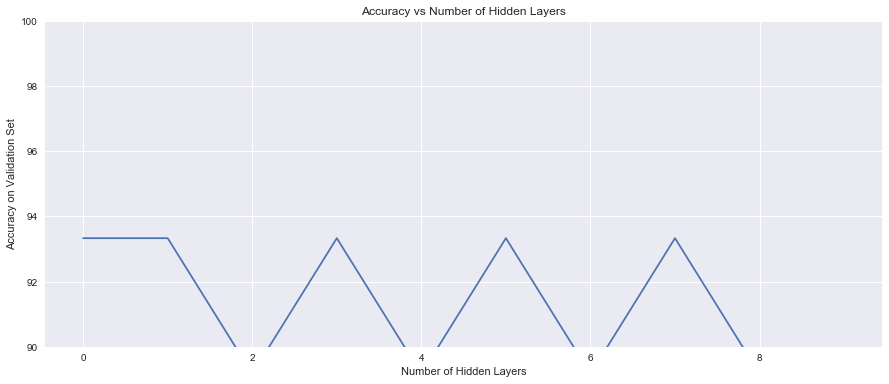

In [92]:
plt.ylim([80,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [101]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(1,11):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 2))
    
    
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=1, kernel_initializer="uniform")`
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
278/278 [==============================] - 4s 14ms/step - loss: 0.6914 - acc: 0.6583
Epoch 2/20
278/278 [==============================] - 0s 599us/step - loss: 0.6877 - acc: 0.6439
Epoch 3/20
278/278 [==============================] - 0s 491us/step - loss: 0.6827 - acc: 0.6439
Epoch 4/20
278/278 [==============================] - 0s 459us/step - loss: 0.6763 - acc: 0.6439
Epoch 5/20
278/278 [==============================] - 0s 456us/step - loss: 0.6681 - acc: 0.8273
Epoch 6/20
278/278 [==============================] - 0s 499us/step - loss: 0.6586 - acc: 0.9173
Epoch 7/20
278/278 [==============================] - 0s 782us/step - loss: 0.6476 - acc: 0.9173
Epoch 8/20
278/278 [==============================] - 0s 725us/step - loss: 0.6357 - acc: 0.9173
Epoch 9/20
278/278 [==============================] - 0s 617us/step - loss: 0.6230 - acc: 0.9281
Epoch 10/20
278/278 [==============================] - 0s 696us/step - loss: 0.6098 - acc: 0.9209
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=2, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 4s 13ms/step - loss: 0.6913 - acc: 0.6439
Epoch 2/20
278/278 [==============================] - 0s 965us/step - loss: 0.6869 - acc: 0.6439
Epoch 3/20
278/278 [==============================] - 0s 718us/step - loss: 0.6808 - acc: 0.6439
Epoch 4/20
278/278 [==============================] - 0s 692us/step - loss: 0.6727 - acc: 0.6439
Epoch 5/20
278/278 [==============================] - 0s 642us/step - loss: 0.6628 - acc: 0.6439
Epoch 6/20
278/278 [==============================] - 0s 994us/step - loss: 0.6513 - acc: 0.6439
Epoch 7/20
278/278 [==============================] - 0s 793us/step - loss: 0.6380 - acc: 0.6439
Epoch 8/20
278/278 [==============================] - 0s 728us/step - loss: 0.6242 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 639us/step - loss: 0.6093 - acc: 0.6439
Epoch 10/20
278/278 [==============================] - 0s 581us/step - loss: 0.5942 - acc: 0.6439
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=3, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 5s 17ms/step - loss: 0.6907 - acc: 0.6439
Epoch 2/20
278/278 [==============================] - 0s 513us/step - loss: 0.6833 - acc: 0.6439
Epoch 3/20
278/278 [==============================] - 0s 664us/step - loss: 0.6696 - acc: 0.6439
Epoch 4/20
278/278 [==============================] - 0s 829us/step - loss: 0.6510 - acc: 0.6439
Epoch 5/20
278/278 [==============================] - 0s 481us/step - loss: 0.6274 - acc: 0.6439
Epoch 6/20
278/278 [==============================] - 0s 334us/step - loss: 0.6001 - acc: 0.6439
Epoch 7/20
278/278 [==============================] - 0s 344us/step - loss: 0.5727 - acc: 0.6439
Epoch 8/20
278/278 [==============================] - 0s 366us/step - loss: 0.5449 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 542us/step - loss: 0.5200 - acc: 0.6439
Epoch 10/20
278/278 [==============================] - 0s 459us/step - loss: 0.4970 - acc: 0.6439
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=4, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 5s 17ms/step - loss: 0.6902 - acc: 0.6942
Epoch 2/20
278/278 [==============================] - 0s 337us/step - loss: 0.6832 - acc: 0.8921
Epoch 3/20
278/278 [==============================] - 0s 552us/step - loss: 0.6705 - acc: 0.9173
Epoch 4/20
278/278 [==============================] - 0s 570us/step - loss: 0.6521 - acc: 0.9245
Epoch 5/20
278/278 [==============================] - 0s 362us/step - loss: 0.6274 - acc: 0.9245
Epoch 6/20
278/278 [==============================] - 0s 420us/step - loss: 0.5989 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 377us/step - loss: 0.5671 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 542us/step - loss: 0.5344 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 509us/step - loss: 0.5021 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 646us/step - loss: 0.4720 - acc: 0.9209
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=5, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 4s 16ms/step - loss: 0.6903 - acc: 0.6439
Epoch 2/20
278/278 [==============================] - 0s 560us/step - loss: 0.6821 - acc: 0.6439
Epoch 3/20
278/278 [==============================] - 0s 649us/step - loss: 0.6684 - acc: 0.6439
Epoch 4/20
278/278 [==============================] - 0s 395us/step - loss: 0.6492 - acc: 0.6439
Epoch 5/20
278/278 [==============================] - 0s 326us/step - loss: 0.6261 - acc: 0.6439
Epoch 6/20
278/278 [==============================] - 0s 391us/step - loss: 0.5997 - acc: 0.6439
Epoch 7/20
278/278 [==============================] - 0s 793us/step - loss: 0.5722 - acc: 0.6439
Epoch 8/20
278/278 [==============================] - 0s 635us/step - loss: 0.5450 - acc: 0.6439
Epoch 9/20
278/278 [==============================] - 0s 868us/step - loss: 0.5198 - acc: 0.6439
Epoch 10/20
278/278 [==============================] - 0s 793us/step - loss: 0.4975 - acc: 0.6439
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=6, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 4s 13ms/step - loss: 0.6900 - acc: 0.7770
Epoch 2/20
278/278 [==============================] - 0s 348us/step - loss: 0.6822 - acc: 0.9173
Epoch 3/20
278/278 [==============================] - 0s 337us/step - loss: 0.6701 - acc: 0.9101
Epoch 4/20
278/278 [==============================] - 0s 362us/step - loss: 0.6531 - acc: 0.9245
Epoch 5/20
278/278 [==============================] - 0s 355us/step - loss: 0.6312 - acc: 0.9209
Epoch 6/20
278/278 [==============================] - 0s 341us/step - loss: 0.6082 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 348us/step - loss: 0.5844 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 348us/step - loss: 0.5622 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 337us/step - loss: 0.5427 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 337us/step - loss: 0.5256 - acc: 0.9209
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=7, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 4s 13ms/step - loss: 0.6895 - acc: 0.9029
Epoch 2/20
278/278 [==============================] - 0s 323us/step - loss: 0.6798 - acc: 0.9173
Epoch 3/20
278/278 [==============================] - 0s 326us/step - loss: 0.6636 - acc: 0.9245
Epoch 4/20
278/278 [==============================] - 0s 344us/step - loss: 0.6407 - acc: 0.9209
Epoch 5/20
278/278 [==============================] - 0s 348us/step - loss: 0.6105 - acc: 0.9209
Epoch 6/20
278/278 [==============================] - 0s 326us/step - loss: 0.5763 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 330us/step - loss: 0.5390 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 359us/step - loss: 0.5043 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 330us/step - loss: 0.4709 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 348us/step - loss: 0.4422 - acc: 0.9209
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=8, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 3s 12ms/step - loss: 0.6875 - acc: 0.9173
Epoch 2/20
278/278 [==============================] - 0s 323us/step - loss: 0.6735 - acc: 0.9173
Epoch 3/20
278/278 [==============================] - 0s 327us/step - loss: 0.6483 - acc: 0.9101
Epoch 4/20
278/278 [==============================] - 0s 341us/step - loss: 0.6122 - acc: 0.9209
Epoch 5/20
278/278 [==============================] - 0s 348us/step - loss: 0.5678 - acc: 0.9209
Epoch 6/20
278/278 [==============================] - 0s 330us/step - loss: 0.5189 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 352us/step - loss: 0.4705 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 373us/step - loss: 0.4255 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 319us/step - loss: 0.3872 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 355us/step - loss: 0.3546 - acc: 0.9209
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=9, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 4s 13ms/step - loss: 0.6907 - acc: 0.5755
Epoch 2/20
278/278 [==============================] - 0s 366us/step - loss: 0.6829 - acc: 0.7446
Epoch 3/20
278/278 [==============================] - 0s 344us/step - loss: 0.6702 - acc: 0.9173
Epoch 4/20
278/278 [==============================] - 0s 330us/step - loss: 0.6511 - acc: 0.9245
Epoch 5/20
278/278 [==============================] - 0s 334us/step - loss: 0.6263 - acc: 0.9209
Epoch 6/20
278/278 [==============================] - 0s 341us/step - loss: 0.5975 - acc: 0.9209
Epoch 7/20
278/278 [==============================] - 0s 348us/step - loss: 0.5651 - acc: 0.9209
Epoch 8/20
278/278 [==============================] - 0s 359us/step - loss: 0.5330 - acc: 0.9209
Epoch 9/20
278/278 [==============================] - 0s 348us/step - loss: 0.5009 - acc: 0.9209
Epoch 10/20
278/278 [==============================] - 0s 334us/step - loss: 0.4710 - acc: 0.9209
Epoch 11/20
278/278 [=========

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=10, kernel_initializer="uniform")`
  import sys


Epoch 1/20
278/278 [==============================] - 4s 13ms/step - loss: 0.6896 - acc: 0.6367
Epoch 2/20
278/278 [==============================] - 0s 337us/step - loss: 0.6777 - acc: 0.7158
Epoch 3/20
278/278 [==============================] - 0s 330us/step - loss: 0.6564 - acc: 0.9173
Epoch 4/20
278/278 [==============================] - 0s 341us/step - loss: 0.6253 - acc: 0.9173
Epoch 5/20
278/278 [==============================] - 0s 359us/step - loss: 0.5861 - acc: 0.9173
Epoch 6/20
278/278 [==============================] - 0s 352us/step - loss: 0.5420 - acc: 0.9281
Epoch 7/20
278/278 [==============================] - 0s 362us/step - loss: 0.4956 - acc: 0.9281
Epoch 8/20
278/278 [==============================] - 0s 402us/step - loss: 0.4515 - acc: 0.9281
Epoch 9/20
278/278 [==============================] - 0s 334us/step - loss: 0.4107 - acc: 0.9281
Epoch 10/20
278/278 [==============================] - 0s 337us/step - loss: 0.3752 - acc: 0.9209
Epoch 11/20
278/278 [=========

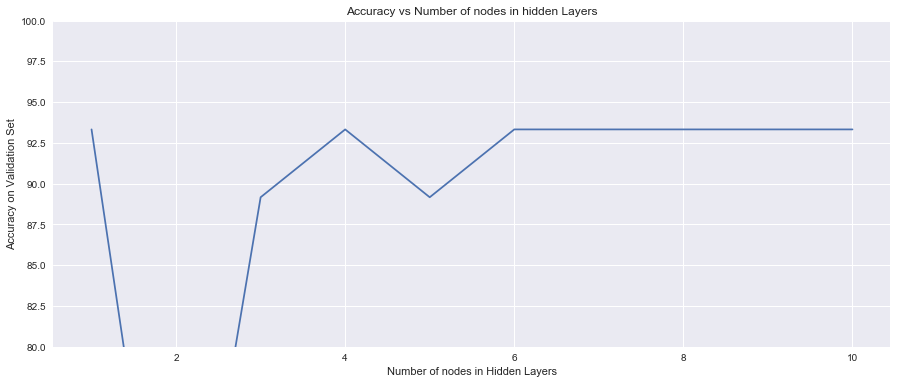

In [103]:
plt.ylim([80,100])
plt.plot(range(1,11),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [104]:
accuracy_validation = [None]*20
count = 0
for batchSize in range(5,25):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 2))
    
  
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 10)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=6, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
278/278 [==============================] - 4s 16ms/step - loss: 0.6845 - acc: 0.9101
Epoch 2/10
278/278 [==============================] - 0s 972us/step - loss: 0.6507 - acc: 0.9173
Epoch 3/10
278/278 [==============================] - 0s 786us/step - loss: 0.5917 - acc: 0.9101
Epoch 4/10
278/278 [==============================] - 0s 811us/step - loss: 0.5185 - acc: 0.9101
Epoch 5/10
278/278 [==============================] - 0s 782us/step - loss: 0.4444 - acc: 0.9173
Epoch 6/10
278/278 [==============================] - 0s 1ms/step - loss: 0.3813 - acc: 0.9209
Epoch 7/10
278/278 [==============================] - 0s 1ms/step - loss: 0.3317 - acc: 0.9209
Epoch 8/10
278/278 [==============================] - 0s 886us/step - loss: 0.2981 - acc: 0.9209
Epoch 9/10
278/278 [==============================] - 0s 847us/step - loss: 0.2769 - acc: 0.9209
Epoch 10/10
278/278 [==============================] - 0s 1ms/step - loss: 0.2645 - acc: 0.9209
Epoch 1/10
278/278 [================

278/278 [==============================] - 0s 334us/step - loss: 0.6350 - acc: 0.9245
Epoch 6/10
278/278 [==============================] - 0s 355us/step - loss: 0.6083 - acc: 0.9209
Epoch 7/10
278/278 [==============================] - 0s 373us/step - loss: 0.5786 - acc: 0.9209
Epoch 8/10
278/278 [==============================] - 0s 344us/step - loss: 0.5472 - acc: 0.9209
Epoch 9/10
278/278 [==============================] - 0s 330us/step - loss: 0.5139 - acc: 0.9209
Epoch 10/10
278/278 [==============================] - 0s 348us/step - loss: 0.4818 - acc: 0.9209
Epoch 1/10
278/278 [==============================] - 5s 17ms/step - loss: 0.6909 - acc: 0.6439
Epoch 2/10
278/278 [==============================] - 0s 384us/step - loss: 0.6858 - acc: 0.6439
Epoch 3/10
278/278 [==============================] - 0s 391us/step - loss: 0.6775 - acc: 0.8417
Epoch 4/10
278/278 [==============================] - 0s 352us/step - loss: 0.6659 - acc: 0.9173
Epoch 5/10
278/278 [=====================

278/278 [==============================] - 0s 251us/step - loss: 0.6338 - acc: 0.9209
Epoch 10/10
278/278 [==============================] - 0s 237us/step - loss: 0.6220 - acc: 0.9209
Epoch 1/10
278/278 [==============================] - 5s 18ms/step - loss: 0.6911 - acc: 0.7086
Epoch 2/10
278/278 [==============================] - 0s 230us/step - loss: 0.6871 - acc: 0.6439
Epoch 3/10
278/278 [==============================] - 0s 244us/step - loss: 0.6821 - acc: 0.7374
Epoch 4/10
278/278 [==============================] - 0s 255us/step - loss: 0.6749 - acc: 0.9173
Epoch 5/10
278/278 [==============================] - 0s 230us/step - loss: 0.6660 - acc: 0.9173
Epoch 6/10
278/278 [==============================] - 0s 208us/step - loss: 0.6548 - acc: 0.9173
Epoch 7/10
278/278 [==============================] - 0s 204us/step - loss: 0.6412 - acc: 0.9317
Epoch 8/10
278/278 [==============================] - 0s 219us/step - loss: 0.6252 - acc: 0.9209
Epoch 9/10
278/278 [=====================

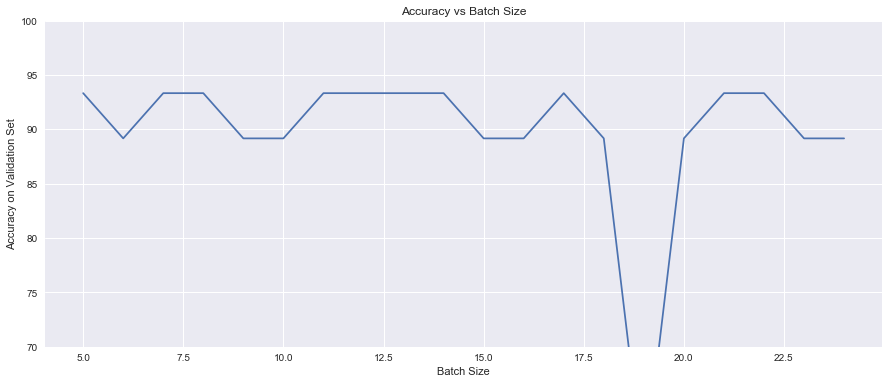

In [106]:
plt.ylim([70,100])
plt.plot(range(5,25),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

In [110]:
accuracy_test = [None]*20
count = 0
for nb_epoch in range(5,25):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 2))
    
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 12, nb_epoch = nb_epoch)
    accuracy_test[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=6, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
278/278 [==============================] - 4s 16ms/step - loss: 0.6898 - acc: 0.8561
Epoch 2/5
278/278 [==============================] - 0s 581us/step - loss: 0.6827 - acc: 0.9173
Epoch 3/5
278/278 [==============================] - 0s 542us/step - loss: 0.6717 - acc: 0.9173
Epoch 4/5
278/278 [==============================] - 0s 610us/step - loss: 0.6556 - acc: 0.9137
Epoch 5/5
278/278 [==============================] - 0s 542us/step - loss: 0.6347 - acc: 0.9209
Epoch 1/6
278/278 [==============================] - 4s 16ms/step - loss: 0.6908 - acc: 0.6475
Epoch 2/6
278/278 [==============================] - 0s 402us/step - loss: 0.6842 - acc: 0.7050
Epoch 3/6
278/278 [==============================] - 0s 459us/step - loss: 0.6737 - acc: 0.9173
Epoch 4/6
278/278 [==============================] - 0s 445us/step - loss: 0.6588 - acc: 0.9137
Epoch 5/6
278/278 [==============================] - 0s 391us/step - loss: 0.6399 - acc: 0.9173
Epoch 6/6
278/278 [=======================

278/278 [==============================] - 0s 359us/step - loss: 0.6541 - acc: 0.6439
Epoch 5/14
278/278 [==============================] - 0s 377us/step - loss: 0.6329 - acc: 0.7842
Epoch 6/14
278/278 [==============================] - 0s 344us/step - loss: 0.6077 - acc: 0.9173
Epoch 7/14
278/278 [==============================] - 0s 344us/step - loss: 0.5788 - acc: 0.9173
Epoch 8/14
278/278 [==============================] - 0s 326us/step - loss: 0.5477 - acc: 0.9173
Epoch 9/14
278/278 [==============================] - 0s 355us/step - loss: 0.5160 - acc: 0.9173
Epoch 10/14
278/278 [==============================] - 0s 344us/step - loss: 0.4843 - acc: 0.9173
Epoch 11/14
278/278 [==============================] - 0s 359us/step - loss: 0.4549 - acc: 0.9173
Epoch 12/14
278/278 [==============================] - 0s 344us/step - loss: 0.4268 - acc: 0.9173
Epoch 13/14
278/278 [==============================] - 0s 326us/step - loss: 0.4020 - acc: 0.9281
Epoch 14/14
278/278 [================

Epoch 8/19
278/278 [==============================] - 0s 416us/step - loss: 0.5770 - acc: 0.9209
Epoch 9/19
278/278 [==============================] - 0s 337us/step - loss: 0.5576 - acc: 0.9209
Epoch 10/19
278/278 [==============================] - 0s 359us/step - loss: 0.5407 - acc: 0.9209
Epoch 11/19
278/278 [==============================] - 0s 348us/step - loss: 0.5260 - acc: 0.9209
Epoch 12/19
278/278 [==============================] - 0s 348us/step - loss: 0.5143 - acc: 0.9209
Epoch 13/19
278/278 [==============================] - 0s 344us/step - loss: 0.5046 - acc: 0.9209
Epoch 14/19
278/278 [==============================] - 0s 337us/step - loss: 0.4958 - acc: 0.9209
Epoch 15/19
278/278 [==============================] - 0s 362us/step - loss: 0.4876 - acc: 0.9209
Epoch 16/19
278/278 [==============================] - 0s 341us/step - loss: 0.4802 - acc: 0.9209
Epoch 17/19
278/278 [==============================] - 0s 362us/step - loss: 0.4733 - acc: 0.9209
Epoch 18/19
278/278 [=

278/278 [==============================] - 0s 370us/step - loss: 0.4763 - acc: 0.9209
Epoch 11/23
278/278 [==============================] - 0s 344us/step - loss: 0.4408 - acc: 0.9209
Epoch 12/23
278/278 [==============================] - 0s 348us/step - loss: 0.4085 - acc: 0.9209
Epoch 13/23
278/278 [==============================] - 0s 344us/step - loss: 0.3807 - acc: 0.9209
Epoch 14/23
278/278 [==============================] - 0s 341us/step - loss: 0.3567 - acc: 0.9209
Epoch 15/23
278/278 [==============================] - 0s 348us/step - loss: 0.3362 - acc: 0.9209
Epoch 16/23
278/278 [==============================] - 0s 384us/step - loss: 0.3191 - acc: 0.9209
Epoch 17/23
278/278 [==============================] - 0s 341us/step - loss: 0.3055 - acc: 0.9209
Epoch 18/23
278/278 [==============================] - 0s 337us/step - loss: 0.2940 - acc: 0.9209
Epoch 19/23
278/278 [==============================] - 0s 348us/step - loss: 0.2855 - acc: 0.9209
Epoch 20/23
278/278 [===========

Test accuracy after pca dimensionality reduction 96.49 %


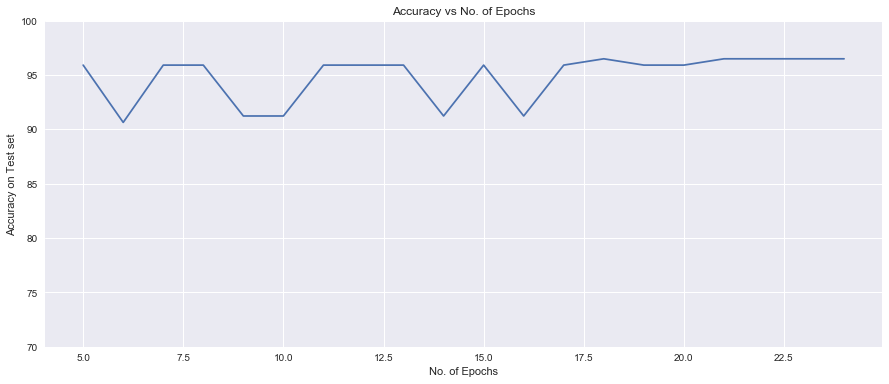

In [111]:
plt.ylim([70,100])
plt.plot(range(5,25),accuracy_test)
plt.title("Accuracy vs No. of Epochs")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy on Test set")
print('Test accuracy',max(accuracy_test),'%')